In [39]:
import scipy.stats as stats
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### EXERCISE 1. 
What is the normal body temperature for healthy humans? A random sample of 130 healthy human body 
temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [5]:
x_bar = 98.25 # sample mean
n = 130 # number of samples
s = 0.73 # sd of population
mu = 0 # Population mean

#### Confidence Interval= x_bar ± (z *(s/sqrt(n) )
For a 99% confidence level, the z-score is approximately 2.576

In [3]:
z = 2.576 # For a 99% confidence level, approximat the z-score

In [7]:
ci = z * (s / sqrt(n))
ci

0.16492900641464822

In [9]:
print(f"Average body temperature of healthy people in 99% confidence level is approximately between {x_bar-ci} and {x_bar+ci} ")

Average body temperature of healthy people in 99% confidence level is approximately between 98.08507099358535 and 98.41492900641465 


In [12]:
# 2. Method with z score and scipy
sem = s / np.sqrt(n) # standard error of the mean
sem

0.06402523540941313

In [15]:
ci_z = stats.norm.interval(0.99, x_bar, sem)  #  Calculate 99% Confidence Interval
ci_z

(98.08508192246582, 98.41491807753418)

In [16]:
# 3. Method with t score and scipy
ci_t = stats.t.interval(0.99,
                        n-1,
                        loc=x_bar,
                        scale=sem)
ci_t

(98.08260738705933, 98.41739261294067)

### EXERCISE 2.
The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.

Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [18]:
confidence = 0.95 # confidence interval for the mean length of stay for the population of patients
n = 500 # sample size
x_bar = 5.4 # sample mean
s = 3.1 # standard deviation of sample

In [20]:
sem = s / np.sqrt(n) # standard error of the mean
sem

0.13863621460498696

In [21]:
ci_z = stats.norm.interval(0.95, x_bar, sem)  # estimated average number of days required for inpatient treatment of patients 
ci_z                                          # between the ages of 25 and 34

(5.12827801242126, 5.67172198757874)

### EXERCISE 3.
The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [28]:
mu = 13.20    # population mean
sigma = 2.50  # standard deviation of population
n = 40        # sample size
x_bar = 12.20 # sample mean


In [36]:
z = (x_bar - mu)/ (sigma/sqrt(n))
z

-2.5298221281347035

In [83]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [84]:
alpha = 0.01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


### EXERCISE 4.
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [96]:
df = pd.read_excel("soil.xlsx")

In [ ]:
si = 1 # 1% significance level

In [97]:
soil1 = df['Soil1'].dropna()
soil2 = df['Soil2']


In [99]:
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(soil1, soil2)

# Output the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 5.1681473319343345
p-value: 2.593228732352821e-06


In [62]:
alpha = 0.01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


With a t-statistic of approximately 5.168 and a p-value of 2.593228732352821e-06, we can see that the p-value is much smaller than 0.01. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the average shear strength between the two soils at the 1% significance level. This confirms that the soils appear to differ with respect to average shear strength.

### EXERCISE 5.
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [101]:
data = pd.read_csv("2015 PISA Test - Sheet1.csv" )
data

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [103]:
continent_groups = ['AS', 'EU', 'AF', 'NA', 'SA', 'OC']
continent_data = {continent: data[data['Continent_Code'] == continent] for continent in continent_groups}

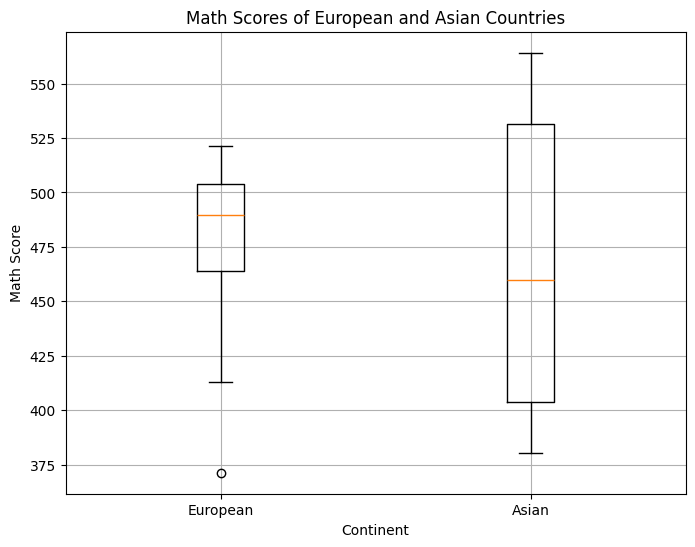

Descriptive Statistics:

Continent: AS
count     17.000000
mean     466.216647
std       64.356490
min      380.259000
25%      403.833200
50%      459.816000
75%      531.296100
max      564.189700
Name: Math, dtype: float64

Continent: EU
count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: Math, dtype: float64

Continent: AF
count      2.000000
mean     363.212100
std        5.099513
min      359.606200
25%      361.409150
50%      363.212100
75%      365.015050
max      366.818000
Name: Math, dtype: float64

Continent: NA
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Math, dtype: float64

Continent: SA
count      7.000000
mean     402.887700
std       18.128894
min      377.069500
25%      388.102200
50%      409.033300
75%      417.617650
max      422.671400
Name: Math, dtype: float64

Continent: OC
count  

In [105]:
statistics = {}
for continent, continent_df in continent_data.items():
    statistics[continent] = continent_df['Math'].describe()

# Compare the average math scores between European and Asian countries
european_scores = continent_data['EU']['Math']
asian_scores = continent_data['AS']['Math']
t_stat, p_value = stats.ttest_ind(european_scores, asian_scores, equal_var=True)

# Draw side-by-side box plots
plt.figure(figsize=(8, 6))
plt.boxplot([european_scores, asian_scores], labels=['European', 'Asian'])
plt.title('Math Scores of European and Asian Countries')
plt.xlabel('Continent')
plt.ylabel('Math Score')
plt.grid(True)
plt.show()

# Output the results
print("Descriptive Statistics:")
for continent, stats in statistics.items():
    print("\nContinent:", continent)
    print(stats)

print("\nT-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

-- We have a Null Hypothesis which is "There is no significant difference in math scores between European (EU) and Asian (AS) countries."
-- According to the t-statistics, since the p-value (0.38826888111307345) is greater than the significance level (usually 0.05), we cannot reject the hypothesis. 
-- Based on these results, we can conclude that there is no significant difference in math scores between European (EU) and Asian (AS) countries.